In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import ceil,sqrt
from tqdm import tqdm
import scipy.io
np.set_printoptions(precision=3)

# Q1

In [2]:
# Construct the covariance matrix for a Markov-1 process
def get_markov1_cov(rho=0.91, sz = 8):
    R1 = np.zeros((sz,sz))
    for i in range(sz):
        for j in range(sz):
            R1[i,j] = rho**(abs(i-j))
    return R1

# FUnction to obtain the Walsh Haddamard transformation matrix given "n". 
# Here the output will be a square transformation matrix of size 2^n
def get_WH(n = 3):
    H1 = np.array([[1,1],[1,-1]])/np.sqrt(2)
    U_wh = H1
    for _ in range(n-1):
        U_wh = np.kron(U_wh,H1)
    return U_wh

# Function to compute the DCT matrix given its size. Output will be of shape NxN
def get_DCT_mat(N = 8):
    U = np.zeros((8,8))
    for i in range(N):
        for j in range(N):
            if i==0: U[i,j] = 1/sqrt(N)
            else: U[i,j] = sqrt(2/N)*(np.cos((np.pi*(2*j+1)*i)/(2*N)))
    
    return U

# Function to compute the Energy Packing Efficiency(EPE) of a matrix and parameter m
def EPE(M, m):
    return np.trace(M[:m,:m])/np.trace(M)

# Function to compute Decorrelation Efficiency given R' and R
def decor_eff(Rp, R):
    f = lambda x: np.sum(np.abs(x)) - np.trace(np.abs(x))
    return 1 - (f(Rp)/f(R))

# Using the data rho = 0.91 given,
rho=0.91
# compute the covariance matrix for the Markov-I process
R = get_markov1_cov(rho = rho)

### Walsh Haddamard Transform

In [3]:
U_wh = get_WH()
Rp1 = U_wh @ R @ (U_wh.T)
epe1 = np.around([EPE(Rp1, i) for i in range(1,9)], 4)
dce1 = decor_eff(Rp=Rp1, R=R)
print(f"Energy Packing Efficiencies: {epe1}")
print("Decorrelation Efficiency: %f"%(dce1))

Energy Packing Efficiencies: [0.793 0.803 0.831 0.843 0.942 0.954 0.988 1.   ]
Decorrelation Efficiency: 0.948567


### Discrete Cosine Transform

In [4]:
U_dct = get_DCT_mat()
Rp2 = U_dct @ R @ (U_dct.T)
epe2 = np.around([EPE(Rp2, i) for i in range(1,9)], 4)
dce2 = decor_eff(Rp=Rp2, R=R)
print(f"Energy Packing Efficiencies: {epe2}")
print("Decorrelation Efficiency: %f"%(dce2))

Energy Packing Efficiencies: [0.793 0.909 0.948 0.967 0.979 0.987 0.994 1.   ]
Decorrelation Efficiency: 0.980471


Comparing energy packing efficiencies and decorrelation efficiencies for DCT and WHT, we can clearly see that the efficiencies for DCT are higher than the corresponding values for WHT.

In [5]:
# Eigenvalue decomposition for R
w,v = np.linalg.eig(R)
v

array([[-0.327, -0.473,  0.469,  0.428,  0.366,  0.288,  0.198, -0.101],
       [-0.349, -0.424,  0.218, -0.076, -0.341, -0.486, -0.463,  0.279],
       [-0.365, -0.292, -0.169, -0.483, -0.358,  0.091,  0.459, -0.415],
       [-0.372, -0.104, -0.451, -0.279,  0.349,  0.415, -0.19 ,  0.489],
       [-0.372,  0.104, -0.451,  0.279,  0.349, -0.415, -0.19 , -0.489],
       [-0.365,  0.292, -0.169,  0.483, -0.358, -0.091,  0.459,  0.415],
       [-0.349,  0.424,  0.218,  0.076, -0.341,  0.486, -0.463, -0.279],
       [-0.327,  0.473,  0.469, -0.428,  0.366, -0.288,  0.198,  0.101]])

In [6]:
# Computing DCT basis
print(np.around(U_dct.T,4))

[[ 0.354  0.49   0.462  0.416  0.354  0.278  0.191  0.098]
 [ 0.354  0.416  0.191 -0.098 -0.354 -0.49  -0.462 -0.278]
 [ 0.354  0.278 -0.191 -0.49  -0.354  0.098  0.462  0.416]
 [ 0.354  0.098 -0.462 -0.278  0.354  0.416 -0.191 -0.49 ]
 [ 0.354 -0.098 -0.462  0.278  0.354 -0.416 -0.191  0.49 ]
 [ 0.354 -0.278 -0.191  0.49  -0.354 -0.098  0.462 -0.416]
 [ 0.354 -0.416  0.191  0.098 -0.354  0.49  -0.462  0.278]
 [ 0.354 -0.49   0.462 -0.416  0.354 -0.278  0.191 -0.098]]


We can see that the eigenvectors and DCT basis  are almost equal. This might be because of the high decorrelation efficiency observed for DCT. However, the values are not exactly the same because the efficiency is very close to, but still less than 1.

# Q2

In [7]:
# Construct the tridiagonal matrix of the form given with rho as a parameter.
# alpha is calculated from rho
def get_tridiag_mat(rho, sz = 8):
    # Compute alpha
    alpha = (rho)/(1+rho**2)

    Q = np.identity(sz)
    Q[0,0]-=alpha
    Q[-1,-1]-=alpha
    for i in range(sz-1):
        Q[i,i+1] = -alpha
        Q[i+1,i]= -alpha
    return Q

# Compute and show the tridiagonal matrix with the given value of rho
rho = 0.91
Q = get_tridiag_mat(rho = rho)
print(np.around(Q,4))

[[ 0.502 -0.498  0.     0.     0.     0.     0.     0.   ]
 [-0.498  1.    -0.498  0.     0.     0.     0.     0.   ]
 [ 0.    -0.498  1.    -0.498  0.     0.     0.     0.   ]
 [ 0.     0.    -0.498  1.    -0.498  0.     0.     0.   ]
 [ 0.     0.     0.    -0.498  1.    -0.498  0.     0.   ]
 [ 0.     0.     0.     0.    -0.498  1.    -0.498  0.   ]
 [ 0.     0.     0.     0.     0.    -0.498  1.    -0.498]
 [ 0.     0.     0.     0.     0.     0.    -0.498  0.502]]


Compute $M1 = \beta^2 R^{-1}$ where $\beta = \frac{1-\rho^2}{1+\rho^2}$

In [8]:
# Compute beta from rho
beta = np.sqrt((1-rho**2)/(1+rho**2))
M1 = (beta**2)*np.linalg.inv(R)
print(np.around(M1, 4))

[[ 0.547 -0.498 -0.    -0.    -0.    -0.     0.    -0.   ]
 [-0.498  1.    -0.498 -0.    -0.     0.    -0.     0.   ]
 [-0.    -0.498  1.    -0.498  0.    -0.     0.    -0.   ]
 [-0.    -0.    -0.498  1.    -0.498  0.    -0.     0.   ]
 [-0.    -0.     0.    -0.498  1.    -0.498  0.    -0.   ]
 [-0.     0.    -0.     0.    -0.498  1.    -0.498  0.   ]
 [ 0.    -0.     0.     0.    -0.    -0.498  1.    -0.498]
 [-0.     0.     0.    -0.     0.    -0.    -0.498  0.547]]


We can clearly see that $\beta^2 R^{-1}$ is almost equal to the matrix obtained for Q with $\rho = 0.91$. 
Also, $\alpha = \frac{\rho}{1+\rho^2} = 0.498$

Diagonalising $M1(=\beta^2 R^{-1})$ and $Q$ matrices with DCT:-


In [9]:
U_dct = get_DCT_mat()
R_p1 = U_dct @ M1 @ U_dct.T # Diagonalise M1
R_p2 = U_dct @ Q @ U_dct.T # Diagonalise Q
print("Diagonalisation of M1 with DCT matrix: \n",np.around(R_p1,4))
print("\nDiagonalisation of Q with DCT matrix: \n",np.around(R_p2,4))

Diagonalisation of M1 with DCT matrix: 
 [[ 0.016 -0.     0.015  0.     0.011  0.     0.006  0.   ]
 [-0.     0.102 -0.     0.018  0.     0.012  0.     0.004]
 [ 0.015 -0.     0.315  0.     0.015  0.     0.008  0.   ]
 [-0.     0.018  0.     0.634  0.     0.01   0.     0.004]
 [ 0.011  0.     0.015  0.     1.011  0.     0.006  0.   ]
 [ 0.     0.012 -0.     0.01   0.     1.388  0.     0.002]
 [ 0.006  0.     0.008  0.     0.006 -0.     1.707  0.   ]
 [-0.     0.004  0.     0.004 -0.     0.002 -0.     1.921]]

Diagonalisation of Q with DCT matrix: 
 [[ 0.004  0.    -0.     0.     0.    -0.    -0.     0.   ]
 [-0.     0.08  -0.     0.    -0.    -0.     0.    -0.   ]
 [-0.    -0.     0.296  0.    -0.     0.    -0.     0.   ]
 [-0.     0.     0.     0.619  0.    -0.     0.    -0.   ]
 [ 0.    -0.    -0.     0.     1.     0.    -0.    -0.   ]
 [-0.    -0.     0.    -0.     0.     1.381  0.     0.   ]
 [-0.     0.    -0.     0.    -0.     0.     1.704 -0.   ]
 [ 0.    -0.     0.    -0.    -0

We can see that the diagonalisation of $M1(=\beta^2 R^{-1})$ with DCT matrix gives an approximately diagonal matrix. Q, on the other hand is perfectly diagonal. It is also seen that the eigen values obtained along the diagonal for both the matrices(Q and M1) are approximately equal.

# Q3

In [3]:
# Compute SVD of the given square (image) matrix "g"
def SVD(g):
    # Eigenvalue decomposition of g.g^T
    w1, v1 = np.linalg.eig(g @ (g.T))
    # Sort the eigenvalues and eigenvectors in decreasing order of eigenvalues
    idx1   = np.argsort(w1)[::-1]
    w1 = w1[idx1]
    v1 = v1[:,idx1]

    # Eigenvalue decomposition of g^T.g
    w2,v2 = np.linalg.eig((g.T) @ g)
    # Sort the eigenvalues and eigenvectors in decreasing order of eigenvalues
    idx2   = np.argsort(w2)[::-1]
    w2 = w2[idx2]
    v2 = v2[:,idx2]

    # Initialise sigma - the singular matrix
    sigma_diag = np.zeros((len(g),len(g)))
    
    for i in range(len(g)):
        # Singular values are equal to the sq. root of the 
        # eigenvalues of g.g^T or g^T.g
        sigma_diag[i,i] = np.sqrt(w1[i])

        # Checking whether each eigen vector has to be scaled by -1 since we are 
        # taking square root to find singular values
        if(np.sum((g@v2[:,i] - sigma_diag[i,i]*v1[:,i])**2) > np.sum((g@v2[:,i] + sigma_diag[i,i]*v1[:,i])**2)):
            v2[:,i] *= -1

    # Return the SVD of matrix g, where g = v1 * sigma_diag * v2^T
    return v1, sigma_diag, v2


In [4]:
# Load the image file using scipy
content_dict = scipy.io.loadmat('imageFile.mat')
g_mat = np.array(content_dict['g'], np.float64)

# Compute SVD of the image(g_mat)
U,S,V = SVD(g_mat)
print(f"U = \n{np.around(U,4)}")
print(f"S = \n{np.around(S,4)}")
print(f"V = \n{np.around(V,4)}")


U = 
[[ 0.408  0.045 -0.42  -0.472 -0.318 -0.179  0.069  0.543]
 [ 0.411 -0.092 -0.468  0.159  0.645 -0.084  0.329 -0.217]
 [ 0.271 -0.519  0.425 -0.351  0.325 -0.282 -0.41   0.013]
 [ 0.448  0.165  0.101  0.713 -0.125 -0.216 -0.36   0.249]
 [ 0.403  0.319 -0.115 -0.249 -0.113  0.442 -0.451 -0.498]
 [ 0.149  0.146  0.149 -0.078 -0.358 -0.655  0.285 -0.538]
 [ 0.36   0.342  0.615 -0.112  0.152  0.272  0.477  0.199]
 [ 0.277 -0.673  0.024  0.2   -0.445  0.369  0.278 -0.135]]
S = 
[[1169.348    0.       0.       0.       0.       0.       0.       0.   ]
 [   0.     287.695    0.       0.       0.       0.       0.       0.   ]
 [   0.       0.     257.499    0.       0.       0.       0.       0.   ]
 [   0.       0.       0.     214.284    0.       0.       0.       0.   ]
 [   0.       0.       0.       0.     163.175    0.       0.       0.   ]
 [   0.       0.       0.       0.       0.     132.729    0.       0.   ]
 [   0.       0.       0.       0.       0.       0.      45.266   

In [12]:
# Verify correctness of SVD: g == U.S.V^T
print(f"g - U.S.V^T = \n{np.around(g_mat - U@S@V.T,4)}")

g - U.S.V^T = 
[[-0.  0.  0. -0. -0. -0. -0. -0.]
 [ 0. -0. -0.  0.  0. -0. -0. -0.]
 [-0.  0.  0. -0. -0.  0.  0.  0.]
 [-0.  0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  0.  0. -0.  0. -0.]
 [ 0. -0. -0.  0.  0.  0.  0. -0.]
 [ 0. -0.  0.  0. -0.  0. -0. -0.]
 [ 0. -0. -0.  0.  0. -0.  0. -0.]]


It is seen that the singular value decomposition of the matrix g is indeed correct.


# Q4

k=7: 
Sum of squares of singular values = 1033.9950720351148
Frobenius norm of error = 1033.9950720351274

k=6: 
Sum of squares of singular values = 3082.9934969993487
Frobenius norm of error = 3082.9934969993765

k=5: 
Sum of squares of singular values = 20700.091520013928
Frobenius norm of error = 20700.091520013935

k=4: 
Sum of squares of singular values = 47326.22619619667
Frobenius norm of error = 47326.22619619669

k=3: 
Sum of squares of singular values = 93244.03322578664
Frobenius norm of error = 93244.03322578661

k=2: 
Sum of squares of singular values = 159549.95001689155
Frobenius norm of error = 159549.9500168915

k=1: 
Sum of squares of singular values = 242318.0893724801
Frobenius norm of error = 242318.08937247997

k=0: 
Sum of squares of singular values = 1609692.0000000014
Frobenius norm of error = 1609692.0



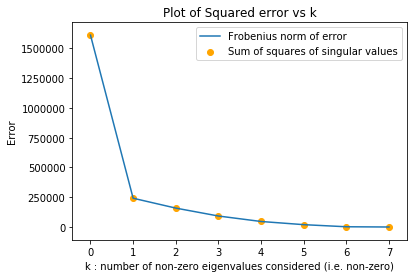

In [13]:
# Reconstruct the matrix g such that only the first k eigenvalues are taken.
def SVD_reconstruct(g, k):
    U,S,V = SVD(g)
    S_prime = S.copy()
    # To form the reconstructed image we make the singular values that aren't required, zero.
    for i in range(k,len(S)):
        S_prime[i,i] = 0.
    
    # Compute the reconstructed image
    g_k = U@S_prime@V.T
    
    # Evaluate the frobenius norm of the difference between the original matrix 
    # and the reconstructed matrix
    error = np.sum((g-g_k)**2)

    # Evaluate the sum of squares of the singular values that have been "discarded" i.e. not taken into account.
    sig_sq_sum = np.sum(((np.diag(S))[k:])**2)

    # Return the reconstructed image and the error along with 
    # the estimated error from the singular values
    return g_k, error, sig_sq_sum

reconstructed_images = []
errs = []
sig_sums = []

# Vary k from 7 to 0 with k=7 meaning that only the lowest eigenvalue is discarded and 
# k=0 meaning that all eigenvalues and discarded. Eigenvalues are discarded from lowest to highest.
for i in range(7,-1,-1):
    g_k, err, sigma_sq_sum = SVD_reconstruct(g = g_mat, k = i)
    reconstructed_images.append(g_k)
    print(f"k={i}: \nSum of squares of singular values = {sigma_sq_sum}\nFrobenius norm of error = {err}\n")
    sig_sums.append(sigma_sq_sum)
    errs.append(err)

# Plotting the variation of frobenius error with k.
# Also showing theoretical estimate of error varying with k
plt.plot(np.arange(7,-1,-1), errs, label = 'Frobenius norm of error')
plt.scatter(np.arange(7,-1,-1), sig_sums, c='orange', label = "Sum of squares of singular values")
plt.title("Plot of Squared error vs k")
plt.xlabel("k : number of non-zero eigenvalues considered (i.e. non-zero)")
plt.ylabel("Error")
plt.legend()
plt.show()


As the number of eigenvalues considered increases, the error decrease as is evident from the graph.

Let us now look that what the reconstructed images look like.

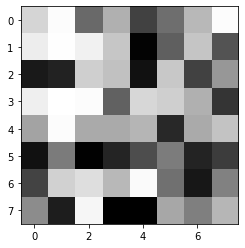

In [14]:
# Show the original image i.e. k=8
plt.imshow(g_mat, cmap='gray')

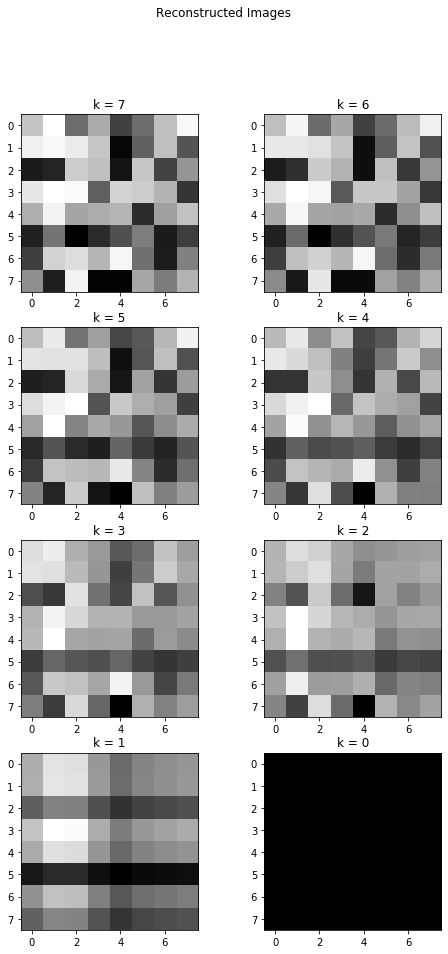

In [15]:
# Plot the different reconstructed images with the corresponding values of k.
f, axs = plt.subplots(4, 2, figsize = (8,15))

for i in range(4):
    for j in range(2):
        axs[i,j].imshow(reconstructed_images[2*i+j], cmap = "gray")
        axs[i,j].set_title(f"k = {7-(i*2+j)}")
plt.suptitle("Reconstructed Images")
plt.show()


The above are the reconstructed images with the given values of "k"